<a href="https://colab.research.google.com/github/TrinhBaThinh-257275/BTVN-AI/blob/nopbai/B%C3%A0i_t%E1%BA%ADp_v%E1%BB%81_b%C3%A3o_v%C3%A0_n%E1%BB%93i_c%C6%A1m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e0d88b0659388c9e5d20a4e40e1779a861f3c2013fab3205dd9418faa4f2d45a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


6.587589743589741


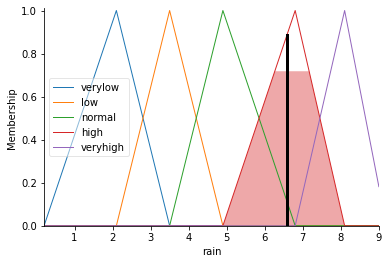

In [ ]:
# Bài tập về mưa, bão
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind= ctrl.Antecedent(np.arange(0.7,3,0.1),"wind")
temp = ctrl.Antecedent(np.arange(20.4,41.2,0.1),"temp")
rain = ctrl.Consequent(np.arange(0.2,9.1,0.1),"rain")

wind['verylow'] = fuzz.trimf(wind.universe,[0.7,1,1.3])
wind['low'] = fuzz.trimf(wind.universe,[1,1.3,1.5])
wind['normal'] = fuzz.trimf(wind.universe,[1,1.6,1.9])
wind['high'] = fuzz.trimf(wind.universe,[1.7,1.9,2.5])
wind['veryhigh'] = fuzz.trimf(wind.universe,[2,2.6,3.1])

temp['verylow'] = fuzz.trimf(temp.universe,[20.4,23.2,25.4])
temp['low'] = fuzz.trimf(temp.universe,[23.2,25.4,28.7])
temp['normal'] = fuzz.trimf(temp.universe,[25.4,29.7,33.6])
temp['high'] = fuzz.trimf(temp.universe,[30.7,35.8,38.6])
temp['veryhigh'] = fuzz.trimf(temp.universe,[35.5,39.1,41.3])

rain['verylow'] = fuzz.trimf(rain.universe,[0.2,2.1,3.5])
rain['low'] = fuzz.trimf(rain.universe,[2.1,3.5,4.9])
rain['normal'] = fuzz.trimf(rain.universe,[3.5,4.9,6.8])
rain['high'] = fuzz.trimf(rain.universe,[4.9,6.8,8.1])
rain['veryhigh'] = fuzz.trimf(rain.universe,[6.8,8.1,9.2])

rule1 = ctrl.Rule(wind['verylow'] & temp['verylow'], rain['verylow'])
rule2 = ctrl.Rule(wind['verylow'] & temp['low'], rain['low'])
rule3 = ctrl.Rule(wind['verylow'] & temp['normal'], rain['normal'])
rule4 = ctrl.Rule(wind['verylow'] & temp['high'], rain['high'])
rule5 = ctrl.Rule(wind['verylow'] & temp['veryhigh'], rain['high'])

rule6 = ctrl.Rule(wind['low'] & temp['verylow'],rain['verylow'])
rule7 = ctrl.Rule(wind['low'] & temp['low'], rain['verylow'])
rule8 = ctrl.Rule(wind['low'] & temp['normal'], rain['high'])
rule9 = ctrl.Rule(wind['low'] & temp['high'], rain['high'])
rule10 = ctrl.Rule(wind['low'] & temp['veryhigh'],rain['veryhigh'])

rule11 = ctrl.Rule(wind['normal'] & temp['verylow'], rain['low'])
rule12 = ctrl.Rule(wind['normal'] & temp['low'], rain['low'])
rule13 = ctrl.Rule(wind['normal'] & temp['normal'], rain['normal'])
rule14 = ctrl.Rule(wind['normal'] & temp['high'], rain['high'])
rule15 = ctrl.Rule(wind['normal'] & temp['veryhigh'], rain['high'])

rule16 = ctrl.Rule(wind['high'] & temp['verylow'], rain['normal'])
rule17 = ctrl.Rule(wind['high'] & temp['low'], rain['normal'])
rule18 = ctrl.Rule(wind['high'] & temp['normal'], rain['high'])
rule19 = ctrl.Rule(wind['high'] & temp['high'],rain['high'])
rule20 = ctrl.Rule(wind['high'] & temp['veryhigh'], rain['veryhigh'])

rule21 = ctrl.Rule(wind['veryhigh'] & temp['verylow'], rain['normal'])
rule22 = ctrl.Rule(wind['veryhigh'] & temp['low'], rain['normal'])
rule23 = ctrl.Rule(wind['veryhigh'] & temp['normal'], rain['high'])
rule24 = ctrl.Rule(wind['veryhigh'] & temp['high'], rain['high'])
rule25 = ctrl.Rule(wind['veryhigh'] & temp['veryhigh'], rain['veryhigh'])

RF_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
RFing = ctrl.ControlSystemSimulation(RF_ctrl)
RFing.input['wind'] = 1.9
RFing.input['temp'] = 30.8
RFing.compute()
print(RFing.output['rain'])
rain.view(sim=RFing)

6.487804878048779


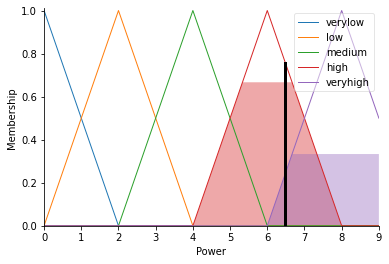

In [ ]:
# Bài tập về nồi cơm
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rice = ctrl.Antecedent(np.arange(0,1.6,0.1), 'Rice')
time = ctrl.Antecedent(np.arange(0,41,1), 'Time')
power = ctrl.Consequent(np.arange(0,10,1), 'Power')
rice.automf(3)
time.automf(3)

rice['verylow'] = fuzz.trimf(rice.universe,[0,0,0.3])
rice['low'] = fuzz.trimf(rice.universe,[0,0.3,0.6])
rice['medium'] = fuzz.trimf(rice.universe,[0.3,0.6,0.9])
rice['high'] = fuzz.trimf(rice.universe,[0.6,0.9,1.2])
rice['veryhigh'] = fuzz.trimf(rice.universe,[0.9,1.2,1.5])

time['verypoor'] = fuzz.trimf(time.universe,[0,0,10])
time['poor'] = fuzz.trimf(time.universe,[0,10,20])
time['medium'] = fuzz.trimf(time.universe,[10,20,30])
time['large'] = fuzz.trimf(time.universe,[20,30,40])


power['verylow'] = fuzz.trimf(power.universe,[0,0,2])
power['low'] = fuzz.trimf(power.universe,[0,2,4])
power['medium'] = fuzz.trimf(power.universe,[2,4,6])
power['high'] = fuzz.trimf(power.universe,[4,6,8])
power['veryhigh'] = fuzz.trimf(power.universe,[6,8,10])

rule1 = ctrl.Rule(time['verypoor'] & rice['verylow'], power['medium'])
rule2 = ctrl.Rule(time['verypoor'] & rice['low'], power['medium'])
rule3 = ctrl.Rule(time['verypoor'] & rice['medium'], power['high'])
rule4 = ctrl.Rule(time['verypoor'] & rice['high'], power['veryhigh'])
rule5 = ctrl.Rule(time['poor'] & rice['veryhigh'], power['veryhigh'])

rule6 = ctrl.Rule(time['poor'] & rice['verylow'], power['medium'])
rule7 = ctrl.Rule(time['poor'] & rice['low'], power['medium'])
rule8 = ctrl.Rule(time['poor'] & rice['medium'], power['high'])
rule9 = ctrl.Rule(time['poor'] & rice['high'], power['high'])
rule10 = ctrl.Rule(time['poor'] & rice['veryhigh'], power['veryhigh'])

rule11 = ctrl.Rule(time['medium'] & rice['verylow'], power['low'])
rule12 = ctrl.Rule(time['medium'] & rice['low'], power['medium'])
rule13 = ctrl.Rule(time['medium'] & rice['medium'], power['medium'])
rule14 = ctrl.Rule(time['medium'] & rice['high'], power['high'])
rule15 = ctrl.Rule(time['medium'] & rice['veryhigh'], power['high'])

rule16 = ctrl.Rule(time['large'] & rice['verylow'], power['verylow'])
rule17 = ctrl.Rule(time['large'] & rice['low'], power['low'])
rule18 = ctrl.Rule(time['large'] & rice['medium'], power['medium'])
rule19 = ctrl.Rule(time['large'] & rice['high'], power['medium'])
rule20 = ctrl.Rule(time['large'] & rice['veryhigh'], power['high'])

powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Rice'] = 1
powering.input['Time'] = 10
powering.compute()
print (powering.output['Power'])
power.view(sim=powering)